In [1]:
#import python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
#import scipy as sp
from scipy.signal import find_peaks
import peakutils

In [25]:
#assign filename variable
#example input: 2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv
filename = input("Input filename:" )
#assign variable for excel reference file
ref_filename = "./Myometrial Contractility Reference.txt"
#assign variable for comments file
comments_filename = filename[0:-4] + "_comments" + ".txt"

Input filename:2018_08_17_Myometrial_Contractility_Study_3_MB_1_8.tsv


In [26]:
#import data from excel reference file
#import muscle bath tsv file (as pandas dataframe?)
#import corresponding comments file
df_file = pd.read_csv(filename, sep='\t')
df_ref = pd.read_csv(ref_filename, sep='\t')
comments_file = open(comments_filename,'r')
df_ref

,Filename,Study,Patient,Bath Number,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),Width1(mm),...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,1,1,1,1.0,0.10,Adiponectin,100.0,21.69,2.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,1,2,0.0,0.00,Adiponectin,100.0,25.97,2.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,1,3,1.0,0.10,Adiponectin,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1,1,4,0.0,0.00,Adiponectin,1000.0,24.07,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,1,5,1.0,0.10,TNF_alpha,0.1,29.79,1.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1,1,6,0.0,0.00,TNF_alpha,0.1,28.96,2.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1,1,7,1.0,0.10,TNF_alpha,1.0,29.16,2.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1,1,8,0.0,0.00,TNF_alpha,1.0,36.41,2.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1,1,9,1.0,0.10,Control,NaN,19.99,2.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1,1,10,0.0,0.00,Control,NaN,19.70,2.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#process comments
cment_time = []
cment_txt = []
for line in comments_file:
    line = line.rstrip()
    line = line.split(sep = '\t')
    cment_time.append(line[0])
    cment_txt.append(line[1])

In [28]:
#drop unneccessary columns
df_file = df_file.drop(columns=['Timestamp','Stimulus'])
#set experiment time as index
df_file.set_index('Experiment Time', inplace = True)
#view first 5 rows of input file
df_file.head()

,Comments,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8
Experiment Time,,,,,,,,,
0.0,NaN,3.304,2.633,7.266,4.144,1.392,1.987,13.14,1.034
1.0,NaN,3.318,2.635,7.487,4.136,1.401,1.979,13.09,1.031
2.0,NaN,3.308,2.620,7.661,4.147,1.409,1.982,13.03,1.026
3.0,NaN,3.306,2.624,7.759,4.113,1.389,1.974,13.01,1.036
4.0,NaN,3.307,2.613,7.868,4.124,1.407,1.975,12.96,1.028


In [29]:
df_ref
#find filename in reference dataframe
df_ref = df_ref[df_ref['Filename'] == filename]
#drop extra columns
df_ref = df_ref[df_ref.columns[0:13]]
#check to see if muscle bundle should be excluded
df_ref = df_ref[df_ref["EXCLUDE SAMPLE"] != 1]
#view processed input file
df_ref.head()

,Filename,Study,Patient,Bath Number,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),Width1(mm),Width2(mm),Mass (mg),EXCLUDE SAMPLE
21,2018_08_17_Myometrial_Contractility_Study_3_MB...,3,GP4,1,1.0,0.05,Adiponectin,100.0,32.77,1.23,1.85,67.0,NaN
22,2018_08_17_Myometrial_Contractility_Study_3_MB...,3,GP4,2,0.0,0.00,Adiponectin,100.0,28.51,1.71,1.88,82.0,NaN
23,2018_08_17_Myometrial_Contractility_Study_3_MB...,3,GP4,3,1.0,0.05,Adiponectin,100.0,30.30,1.45,1.63,64.0,NaN
24,2018_08_17_Myometrial_Contractility_Study_3_MB...,3,GP4,4,0.0,0.00,Adiponectin,100.0,39.44,1.83,1.75,92.0,NaN
25,2018_08_17_Myometrial_Contractility_Study_3_MB...,3,GP4,5,1.0,0.05,TNF_alpha,1.0,38.66,1.29,1.60,68.0,NaN


In [30]:
#print comments with timepoints
for counter, value in enumerate(cment_time):
    print(cment_txt[counter],":",value)
#create a list of the column names where muscle bath force values are stored
Force_list = ["Force1","Force2","Force3","Force4","Force5","Force6","Force7","Force8"]
#create a placeholder list for storing arrays of force data
baseline_array_list = []
#loop through viable muscle baths in study file (df_file) and retrieve baseline force data
#send array of each muscle bath baseline force data to baseline_array_list
for bath in df_ref['Bath Number']:
    print('Muscle Bath',bath,':')
    baseline_endtime = int(input("What time does baseline end"))
    baseline_array = (df_file.loc[baseline_endtime-3599:baseline_endtime,Force_list[(bath)-1]])
    baseline_array_list.append(baseline_array)

Pitocin : 7201.5
Baseline : 10813.0
Treatment : 14509.4
Recovery : 14924.0
Muscle Bath 1 :
What time does baseline end14509
Muscle Bath 2 :
What time does baseline end14509
Muscle Bath 3 :
What time does baseline end14509
Muscle Bath 4 :
What time does baseline end14509
Muscle Bath 5 :
What time does baseline end14509
Muscle Bath 6 :
What time does baseline end14509
Muscle Bath 7 :
What time does baseline end14509
Muscle Bath 8 :
What time does baseline end14509


Muscle Bath 1


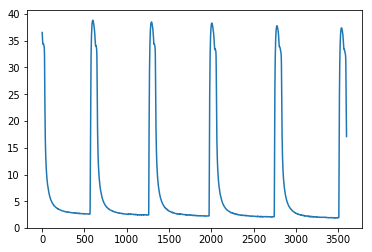

patientGP4_bath1.pdf
Muscle Bath 2


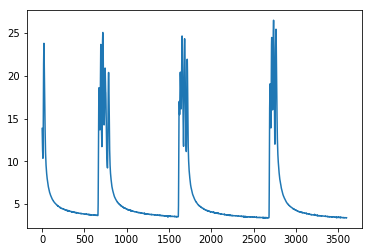

patientGP4_bath2.pdf
Muscle Bath 3


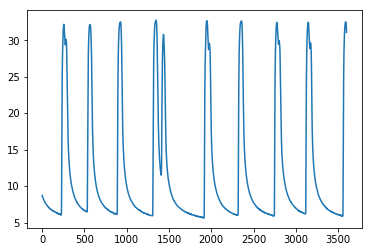

patientGP4_bath3.pdf
Muscle Bath 4


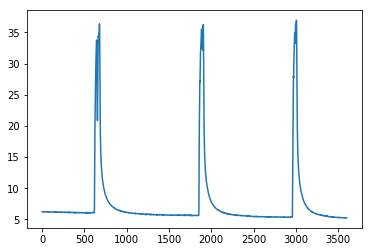

patientGP4_bath4.pdf
Muscle Bath 5


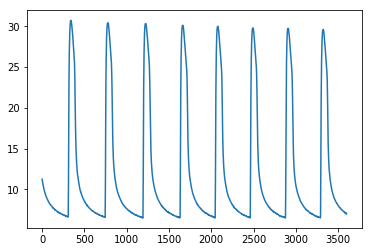

patientGP4_bath5.pdf
Muscle Bath 6


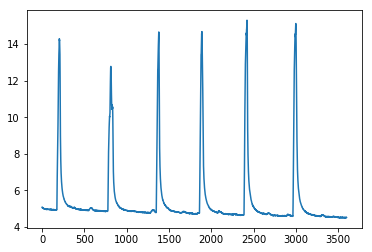

patientGP4_bath6.pdf
Muscle Bath 7


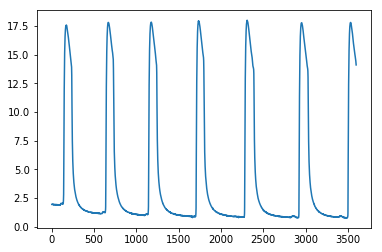

patientGP4_bath7.pdf
Muscle Bath 8


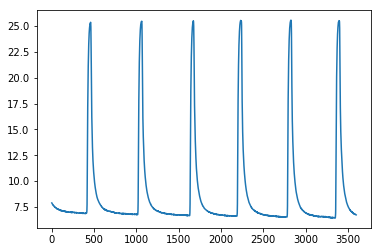

patientGP4_bath8.pdf


In [35]:
#plot the baseline contraction force data from
for bath in df_ref['Bath Number']:
    print("Muscle Bath",bath)
    f = plt.figure()
    plt.plot(np.array(baseline_array_list[bath-1]))
    plt.show()
    savestring = "patient"+(list(df_ref['Patient'])[bath-1])+"_"+"bath"+str(bath)+'.pdf'
    print(savestring)
    f.savefig(savestring,sep = '')

In [36]:
#loop through baths in reference dataframe 
    #for each bath listed in the reference file, find the max/min(local extreme) for the 1 hr of baseline in the muscle bath file
    #ask when baseline ended for each bath and count backwords 1hr

#find local max values
#input the height cut off for peak analysis
locmax_list = []
fp_output_list = []
for bath in df_ref['Bath Number']:
    print("Muscle Bath",bath,":")
    cutoff = float(input("input peak height cutoff:"))
    fp_output = find_peaks(np.array(baseline_array_list[(bath-1)]),height = cutoff, width = 30)
    locmax = np.array(baseline_array_list[(bath-1)])[fp_output[0]]
    locmax_list.append(locmax)
    fp_output_list.append(fp_output)

Muscle Bath 1 :
input peak height cutoff:20
Muscle Bath 2 :
input peak height cutoff:15
Muscle Bath 3 :
input peak height cutoff:20
Muscle Bath 4 :
input peak height cutoff:20
Muscle Bath 5 :
input peak height cutoff:20
Muscle Bath 6 :
input peak height cutoff:8
Muscle Bath 7 :
input peak height cutoff:10
Muscle Bath 8 :
input peak height cutoff:15


In [37]:
#processing find_peaks output
#assigning values from find peaks output to a list of local max indices 
locmax_indx_list = []
for i in range(len(fp_output_list)):
    locmax_indx_list.append(fp_output_list[i][0])
#assigning values from find peaks dictionary ouput to a list (to later be used with calculating duration of contractions, relaxation time, etc.)
locmax_dic_list = []
for i in range(len(fp_output_list)):
    locmax_dic_list.append(fp_output_list[i][1])

In [240]:
#find a baseline/local minima range before each peak
#create an empty list to store start indices
#startlist = []
#create an empty list to store end indices
#endlist = []
#create an empty list to store an arrays of baseline values
#base_val_list = []
#loop through local max indices and calculate start point and end point for baseline calculation as an offset of this timepoint
#store values in startlist and endlist
#for peak_time in locmax_indx_list[0]:
#    starttime = peak_time-105
#    endtime = peak_time-45
#    if starttime < 0:
#        starttime = 0
    #if endtime < 0:
    #    break
#    startlist.append(starttime)
#    endlist.append(endtime)
#loop through contractions, calculate baseline values, assign values to spot in base_val_list
#for i in range(len(startlist)):
#    baseline_values = peakutils.baseline(np.array(baseline_array_list[0])[startlist[i]:endlist[i]])
#    base_val_list.append(baseline_values)
#plot muscle baths with local min baseline and local max values highlighted     
#plt.plot(np.array(baseline_array_list[0]))  
#for counter, base_data in enumerate(base_val_list):
#    plt.plot(np.arange(startlist[counter],endlist[counter]),base_data,'ro')
#for counter, peak in enumerate(locmax_list[0]):
#    plt.plot(locmax_indx_list[0][counter],peak,'ro')
    #plt.plot(locmax_indx_list[0][0],locmax_list[0][0],'ro')
#plt.show()

#arr = []
#for base_val in base_val_list:
#        arr.append(base_val.mean())
#arr = np.array(arr)
#print(arr)


In [239]:
#find a baseline/local minima range before each peak
#create an empty list to store start indices
#startlist = []
#create an empty list to store end indices
#endlist = []
#create an empty list to store an arrays of baseline values
#base_val_list = []
#create an empty list to store baseline means
#base_mean_list = []
#loop through muscle baths
#for bath in df_ref['Bath Number']:
    #reset lists
    #startlist = []
    #endlist = []
    #base_val_list = []
    #base_mean_list = []
    #print("Muscle Bath",bath)
    #loop through local max indices and calculate start point and end point for baseline calculation as an offset of this timepoint
    #store values in startlist and endlist
    #for peak_time in locmax_indx_list[0]:
    #    starttime = peak_time-105
    #    endtime = peak_time-45
    #    if starttime < 0:
    #        starttime = 0
        #if endtime < 0:
        #    break
    #    startlist.append(starttime)
    #    endlist.append(endtime)
    #loop through contractions, calculate baseline values, assign values to spot in base_val_list
    #for i in range(len(startlist)):
    #    baseline_values = peakutils.baseline(np.array(baseline_array_list[0])[startlist[i]:endlist[i]])
    #    base_val_list.append(baseline_values)
    #plot muscle baths with local min baseline and local max values highlighted     
    #plt.plot(np.array(baseline_array_list[0]))  
    #for counter, base_data in enumerate(base_val_list):
    #    plt.plot(np.arange(startlist[counter],endlist[counter]),base_data,'ro')
    #for counter, peak in enumerate(locmax_list[0]):
    #    plt.plot(locmax_indx_list[0][counter],peak,'ro')
    #plt.show()
    #for base_val in base_val_list:
    #    base_mean_list.append(base_val.mean())
    #    base_mean_array = np.array(base_mean_list)
    #print(base_mean_array)
    

Muscle Bath 1


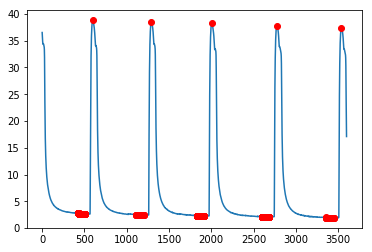

peakanalysisgraphs_patientGP4_bath1.pdf
mean baseline force: [2.7084628  2.4947     2.30238974 2.13358508 1.95296447]
Muscle Bath 2


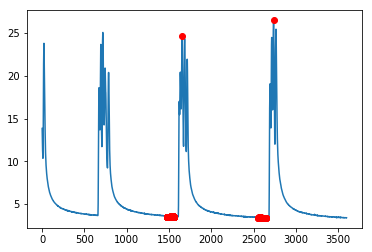

peakanalysisgraphs_patientGP4_bath2.pdf
mean baseline force: [3.53695666 3.42362339]
Muscle Bath 3


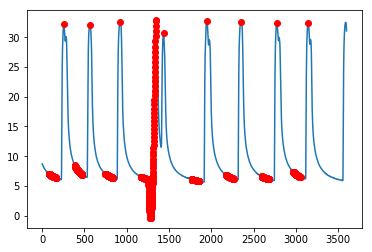

peakanalysisgraphs_patientGP4_bath3.pdf
mean baseline force: [6.67380715 7.52922222 6.66456667 6.2887426  8.82058029 5.94553237
 6.46503886 6.33041696 6.87617778]
Muscle Bath 4


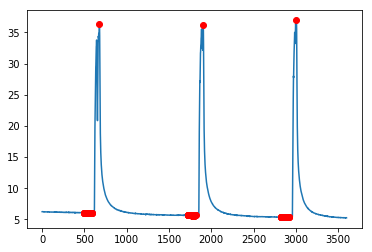

peakanalysisgraphs_patientGP4_bath4.pdf
mean baseline force: [6.0621681  5.6276551  5.35130411]
Muscle Bath 5


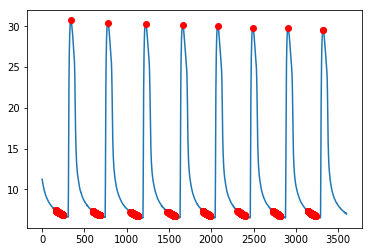

peakanalysisgraphs_patientGP4_bath5.pdf
mean baseline force: [7.11022176 7.02327133 6.94809873 6.97904444 7.00970474 7.03006082
 7.00972222 7.00948915 6.97852604]
Muscle Bath 6


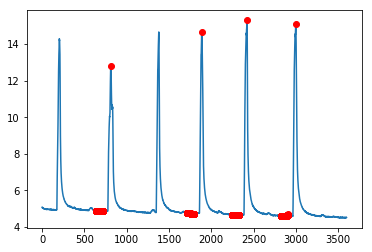

peakanalysisgraphs_patientGP4_bath6.pdf
mean baseline force: [4.89291111 4.7506481  4.67659471 4.61841149]
Muscle Bath 7


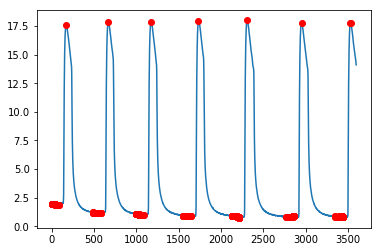

peakanalysisgraphs_patientGP4_bath7.pdf
mean baseline force: [1.9003389  1.15770967 1.01541822 0.901592   0.83743234 0.81272369
 0.82745819 0.82239591]
Muscle Bath 8


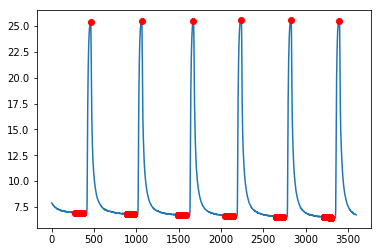

peakanalysisgraphs_patientGP4_bath8.pdf
mean baseline force: [6.89865556 6.78195852 6.69400033 6.625182   6.53322119 6.49871111]


In [38]:
#find a baseline/local minima range before each peak
#create an empty list to store start indices
startlist = []
#create an empty list to store end indices
endlist = []
#create an empty list to store an arrays of baseline values
base_val_list = []
#create an empty list to temporarily store baseline means
templist = []
#create an empty list to append array of baseline means
base = []
#loop through muscle baths
for bath in df_ref['Bath Number']:
    #reset lists
    startlist = []
    endlist = []
    base_val_list = []
    templist = []
    print("Muscle Bath",bath)
    #loop through local max indices and calculate start point and end point for baseline calculation as an offset of this timepoint
    #store values in startlist and endlist
    for peak_time in locmax_indx_list[bath-1]:
        starttime = peak_time-180
        endtime = peak_time-90
        if starttime < 0:
            starttime = 0
        if endtime < 0:
            break
        startlist.append(starttime)
        endlist.append(endtime)
    #loop through contractions, calculate baseline values, assign values to spot in base_val_list
    for i in range(len(startlist)):
        baseline_values = peakutils.baseline(np.array(baseline_array_list[bath-1])[startlist[i]:endlist[i]])
        base_val_list.append(baseline_values)
    #plot muscle baths with local min baseline and local max values highlighted     
    f = plt.figure()

    plt.plot(np.array(baseline_array_list[bath-1])) 
    
    
    for counter, base_data in enumerate(base_val_list):
        plt.plot(np.arange(startlist[counter],endlist[counter]),base_data,'ro')
    for counter, peak in enumerate(locmax_list[bath-1]):
        plt.plot(locmax_indx_list[bath-1][counter],peak,'ro')
    
    plt.show()
    
    savestring = "peakanalysisgraphs_" + "patient"+(list(df_ref['Patient'])[bath-1])+"_"+"bath"+str(bath)+'.pdf'
    
    print(savestring)
    f.savefig(savestring,sep = '')
    
    
    
    #average local min baseline data
    for base_val in base_val_list:
        templist.append(base_val.mean())
        base_mean_array = np.array(templist)
    print("mean baseline force:",base_mean_array)
    #store local min baseline data in list
    base.append(base_mean_array)

In [340]:
#calculate baseline peak forces
for mb in range(len(locmax_list)):
    print ("bath",mb+1,"force (g)")
    for i in range(len(locmax_list[mb])):
        print(locmax_list[mb][i]-base[mb][i])

bath 1 force (g)
18.9819112630546
18.632709699967613
19.09558538231993
18.8231422959469
18.756677455607647
bath 2 force (g)
1.3348846153846208
1.1725555815611708
1.421740063374025
0.7784408159782243
2.2894774962490194
1.0693305145282204
1.5997886592184756
1.260245668517666
bath 3 force (g)
7.8705241233315295
8.128486869849727
8.221666666666682
8.232741914723448
8.183235493732727
bath 4 force (g)
10.866197574144438
12.335807952678026
10.395893586533964
bath 5 force (g)
4.017520582600185
4.339633333333341
4.141868713360385
4.110236239520638
4.472389361320172
4.500618010173997
bath 6 force (g)
1.6476623605662306
1.7099913808435527
2.2595279128570835
2.0025276484333707
2.236479874677417
bath 7 force (g)
8.688235546467544
8.112293460307658
8.118469985934928
7.737368680963026
bath 8 force (g)
26.987789494670103
27.23045155173352
27.38625677396118
27.459478247692314
27.554958827621334


In [357]:
#calculate CSA
CSA_list = []
for bath in df_ref['Bath Number']:
    length = float(df_ref[df_ref['Bath Number']== bath]['Length (mm)'])
    mass = float(df_ref[df_ref['Bath Number']== bath]['Mass (mg)'])
    CSA = (length *1.056)/mass
    CSA_list.append(CSA)
#for i in range(len(CSA_list)):
#    print("Muscle Bath", i + 1)
#    print(CSA_list[i])

In [358]:
#calculate CSA normalized baseline peak forces
for mb in range(len(locmax_list)):
    print ("bath",mb+1,"norm (g/CSA)")
    for i in range(len(locmax_list[mb])):
        print((locmax_list[mb][i]-base[mb][i])/CSA_list[mb])

bath 1 norm (g/CSA)
63.71958439092695
62.547364261973286
64.10117228980673
63.186619482489625
62.96350643847969
bath 2 norm (g/CSA)
5.551582256127733
4.876480473215233
5.912800865098718
3.237417055844281
9.521588980421056
4.447183106294418
6.653277917591908
5.241170218812241
bath 3 norm (g/CSA)
14.393148649325843
14.864895650979545
15.035297347954804
15.055551106041467
14.965016693688515
bath 4 norm (g/CSA)
40.77094718439664
46.285057038924265
39.00632447174662
bath 5 norm (g/CSA)
16.389421095206902
17.70347572252242
16.896697619503325
16.767653368606872
18.24505215028898
18.360210543009558
bath 6 norm (g/CSA)
5.455546595432794
5.6619231459378065
7.481484136128826
6.630534966469892
7.405170172035312
bath 7 norm (g/CSA)
19.303758324003606
18.024114513659033
18.037837686488906
17.19109642944149
bath 8 norm (g/CSA)
65.15851828805877
65.74439435938753
66.12056586553852
66.2973496193962
66.52787509887973


In [359]:
CSA_force = []
for mb in range(len(locmax_list)):
    temps_list = []
    #print ("MUSCLE BATH",mb+1)
    for i in range(len(locmax_list[mb])):
        temps_list.append((locmax_list[mb][i]-base[mb][i])/CSA_list[mb])
    CSA_force.append(np.array(temps_list))
counter = 1    
for forces in CSA_force:
    print ("bath",counter," mean\n",forces.mean(),'\n',"bath",counter," std\n",forces.std(),'\n',sep = '')
    counter+=1

bath1 mean
63.30364937273525
bath1 std
0.5496189811692179

bath2 mean
5.680187609175698
bath2 std
1.7356564686303448

bath3 mean
14.862781889598034
bath3 std
0.24410381304003265

bath4 mean
42.020776231689176
bath4 std
3.1001657409150702

bath5 mean
17.393751749856346
bath5 std
0.7530411636885873

bath6 mean
6.5269318032009265
bath6 std
0.8472676843589426

bath7 mean
18.13920173839826
bath7 std
0.754754174924931

bath8 mean
65.96974064625215
bath8 std
0.47967752015362797



In [ ]:

#print(peak_list[0])
#print(peak_list[0].mean())
#print(peak_list[0].std())

#print(peak_idx_list[0][0])
    


In [80]:
#find the baseline force/minimum value before each peak

#x = argrelextrema(np.array(baseline_array_list[0]), np.less,order=100)
#print(np.array(baseline_array_list[0])[x])
#print(x)
#print(peak_idx_list[0][0])
#np.amin(np.array(baseline_array_list[0][0:500]))
#print(np.array(baseline_array_list[0])[0:500])



#baseline_values = peakutils.baseline(np.array(baseline_array_list[0])[500:1000])

#print(baseline_values)



In [81]:
#gradients=np.diff(np.array(baseline_array_list[0]))
#print(np.argmax(gradients))
#np.array(baseline_array_list[0])[2309]

#subtract minimum value from peak force to calculate amplitude of contraction
#calculate mean value of contraction amplitude
#calculate standard deviation
#calculate contractions amplitude corrected to CSA
#calculate mean value of contractions amplitude/CSA
#calculate standard deviation of contractions amplitude/CSA


#from max/min calculate the amplitudes/peaks
#calculate the average for each bath
#calculate the peaks 

#loop through baths and find peak forces
#input function to determine when baseline period should be

In [ ]:
#4 parameters
#1. peak force or amplitude
#2. frequency or contractions/hour
#3. duration of contractions
#4. relaxation time

In [297]:
#calculate duration/ relaxation time
peaks = find_peaks(np.array(baseline_array_list[0]),height = 10, width = 30)
print(peaks)
print(peaks[1])

(array([ 371, 1017, 1676, 2331, 3003], dtype=int64), {'peak_heights': array([22.71, 22.33, 22.73, 22.45, 22.39]), 'prominences': array([19.013, 18.67 , 19.133, 18.857, 18.8  ]), 'left_bases': array([ 104,  757, 1511, 2061, 2773], dtype=int64), 'right_bases': array([1511, 1511, 3419, 3419, 3419], dtype=int64), 'widths': array([73.36527039, 75.12037037, 75.5745694 , 76.40619883, 78.65058712]), 'width_heights': array([13.2035, 12.995 , 13.1635, 13.0215, 12.99  ]), 'left_ips': array([ 353.30035461,  998.12962963, 1657.12304965, 2312.11222222,
       2984.2189781 ]), 'right_ips': array([ 426.665625  , 1073.25      , 1732.69761905, 2388.51842105,
       3062.86956522])})
{'peak_heights': array([22.71, 22.33, 22.73, 22.45, 22.39]), 'prominences': array([19.013, 18.67 , 19.133, 18.857, 18.8  ]), 'left_bases': array([ 104,  757, 1511, 2061, 2773], dtype=int64), 'right_bases': array([1511, 1511, 3419, 3419, 3419], dtype=int64), 'widths': array([73.36527039, 75.12037037, 75.5745694 , 76.40619883,

In [302]:
peaks[1]['left_bases']

array([ 104,  757, 1511, 2061, 2773], dtype=int64)

In [296]:
comments_file.close()